## **EV MARKET ANALYSIS**

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/EV_Data.csv')
df_1=dataset.copy()

In [ ]:
dataset.head()

,Age,City,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
0,30,Nabha,Single,Graduate,5,1193875.647,Maybe,SUV,Yes,Hyundai,<5 lakhs,2,I don't think so
1,27,Pune,Single,Graduate,4,1844540.398,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years"
2,32,Kashipur,Single,Graduate,4,2948150.113,Yes,Hatchback,Yes,KIA,<15 lakhs,4,"Yes, in <20years"
3,55,Pune,Single,Graduate,3,2832379.739,Maybe,Hatchback,No,Hyundai,<5 lakhs,4,"Yes, in <10 years"
4,26,Satara,Single,Graduate,4,2638750.576,Yes,Sedan,Yes,McLaren,<15 lakhs,4,"Yes, in <20years"


**DATA PREPROCESSING**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Age                                                                   1000 non-null   int64  
 1   City                                                                  1000 non-null   object 
 2   Marital Status                                                        1000 non-null   object 
 3   Education                                                             1000 non-null   object 
 4   No. of Family members                                                 1000 non-null   int64  
 5   Annual Income                                                         1000 non-null   float64
 6   Would you prefer replacing all your vehicles to Electronic vehicles?  1000 non-null   object 
 7 

**Here's a description of what each column in the dataset represents:**

1.   **Age**: The age of the respondent (integer).
2.   **City**: The city where the respondent resides (string/object).
3.   **Marital Status**: The marital status of the respondent, such as single, married, etc. (string/object).
4.   **Education**: The highest level of education attained by the respondent (string/object).
5.**No. of Family members**: The number of family members in the respondent's household (integer).
6.**Annual Income**: The annual income of the respondent (float).
7.**Would you prefer replacing all your vehicles to Electronic vehicles?**: The respondent's preference for replacing all their vehicles with electronic vehicles (string/object; could be Yes, No, or Maybe).
8.**If Yes/Maybe what type of EV would you prefer?**: The type of electronic vehicle the respondent would prefer if they are open to replacing their current vehicles (string/object; applicable if the answer to the previous question is Yes or Maybe).
9.**Do you think Electronic Vehicles are economical?**: The respondent's opinion on whether electronic vehicles are economical (string/object).
10.**Which brand of vehicle do you currently own?**: The brand of the vehicle currently owned by the respondent (string/object).
11.**How much money could you spend on an Electronic vehicle?**: The amount of money the respondent is willing to spend on an electronic vehicle (string/object; likely represents a range or specific amount).
12.**Preference for wheels in EV**: The respondent's preference for the number of wheels in an electronic vehicle (integer).
13.**Do you think Electronic vehicles will replace fuel cars in India?**: The respondent's opinion on whether electronic vehicles will eventually replace fuel cars in India (string/object).

In [ ]:
dataset.shape

(1000, 13)

In [ ]:
dataset.isna().any()

Age                                                                     False
City                                                                    False
Marital Status                                                          False
Education                                                               False
No. of Family members                                                   False
Annual Income                                                           False
Would you prefer replacing all your vehicles to Electronic vehicles?    False
If Yes/Maybe what type of  EV would you prefer?                         False
Do you think Electronic Vehicles are economical?                        False
Which brand of vehicle do you currently own?                            False
How much money could you spend on an Electronic vehicle?                False
Preference for wheels in EV                                             False
Do you think Electronic vehicles will replace fuel cars in India

Thus there are no null values present in the dataset

In [ ]:
# Define a dictionary for replacing similar city names with a standardized name
city_replacements = {
    'Pune ': 'Pune',
    'pune': 'Pune',
    'pUNE': 'Pune',
    'solapur': 'Solapur',
    'Haldwani ': 'Haldwani',
    'Banglore ': 'Bangalore',
    'Faridabad ': 'Faridabad',
    'Chandrapur ': 'Chandrapur',
    'Gurugram ': 'Gurugram',
    'Mumbai ': 'Mumbai',
    'Hakdwani': 'Haldwani',
    'New Delhi ': 'New Delhi',
    'Delhi ': 'New Delhi',
    'nashik': 'Nashik'
}

# Replace the city names in the DataFrame
dataset['City'] = dataset['City'].replace(city_replacements)

# Display the unique city names to verify the replacements
print(dataset['City'].unique())

['Nabha' 'Pune' 'Kashipur ' 'Satara' 'Noida' 'Delhi' 'Mumbai' 'Solapur'
 'Haldwani' 'Nellore ' 'Bangalore' 'Faridabad' 'Nagpur' 'Chandrapur'
 'Chennai' 'Gurugram' 'Nashik' 'Bengaluru' 'Patiyala' 'Ahmedabad' 'Karnal'
 'Rewari' 'New Delhi' 'Serampore' 'Jhansi' 'Jalandhar']


In [ ]:
# Filter out rows with negative annual income
dataset = dataset[dataset['Annual Income'] >= 0]
# Use describe() to generate summary statistics for 'Annual Income' column
income_stats = dataset['Annual Income'].describe()

# Get the minimum and maximum values
income_min = income_stats['min']
income_max = income_stats['max']

# Print the minimum and maximum values
print("Minimum Annual Income:", income_min)
print("Maximum Annual Income:", income_max)

Minimum Annual Income: 27134.78254
Maximum Annual Income: 12821282.03


In [ ]:
bins = [0, 1000000, 2000000, 3000000, 5000000, 10000000, float('inf')]
labels = ['<1M', '1M-2M', '2M-3M', '3M-5M', '5M-10M', '>10M']

# Use cut to bin the values
dataset['Income Category'] = pd.cut(dataset['Annual Income'], bins=bins, labels=labels)
dataset['Income Category'].value_counts()


Income Category
2M-3M     554
1M-2M     286
3M-5M      94
<1M        56
>10M        5
5M-10M      2
Name: count, dtype: int64

In [ ]:
dataset.drop('Annual Income', axis=1, inplace = True)

In [ ]:
dataset.columns

Index(['Age', 'City', 'Marital Status', 'Education', 'No. of Family members',
       'Would you prefer replacing all your vehicles to Electronic vehicles?',
       'If Yes/Maybe what type of  EV would you prefer?',
       'Do you think Electronic Vehicles are economical?',
       'Which brand of vehicle do you currently own?',
       'How much money could you spend on an Electronic vehicle?',
       'Preference for wheels in EV',
       'Do you think Electronic vehicles will replace fuel cars in India?',
       'Income Category'],
      dtype='object')

In [ ]:
#to find all the unique values present in the dataset
for feature in dataset.columns:
    print(feature,':',dataset[feature].unique(),'\n')

Age : [ 30  27  32  55  26  28  23  25  43  59  21  29  56  70  50  24  61  39
  31  40  18  58  22  96  64  52  54  42  49  57  46  36  20  19  65  17
  60  44  45  47  82  33  37  48  69  67  86  62  66  34  63  41  68  16
  53  15 118  38] 

City : ['Nabha' 'Pune' 'Kashipur ' 'Satara' 'Noida' 'Delhi' 'Mumbai' 'Solapur'
 'Haldwani' 'Nellore ' 'Bangalore' 'Faridabad' 'Nagpur' 'Chandrapur'
 'Chennai' 'Gurugram' 'Nashik' 'Bengaluru' 'Patiyala' 'Ahmedabad' 'Karnal'
 'Rewari' 'New Delhi' 'Serampore' 'Jhansi' 'Jalandhar'] 

Marital Status : ['Single' 'Married'] 

Education : ['Graduate' 'Post Graduate'] 

No. of Family members : [5 4 3 2 8 6 0 1 7] 

Would you prefer replacing all your vehicles to Electronic vehicles? : ['Maybe' 'Yes' 'No'] 

If Yes/Maybe what type of  EV would you prefer? : ['SUV' 'Hatchback' 'Sedan' 'Liftback' 'Cabrio'] 

Do you think Electronic Vehicles are economical? : ['Yes' 'No' 'Maybe'] 

Which brand of vehicle do you currently own? : ['Hyundai' 'Honda' 'KIA' 'McLa

**DATA** **VISUALIZATIONS**

Age Distribution: Histogram is used to visualize the distribution of ages

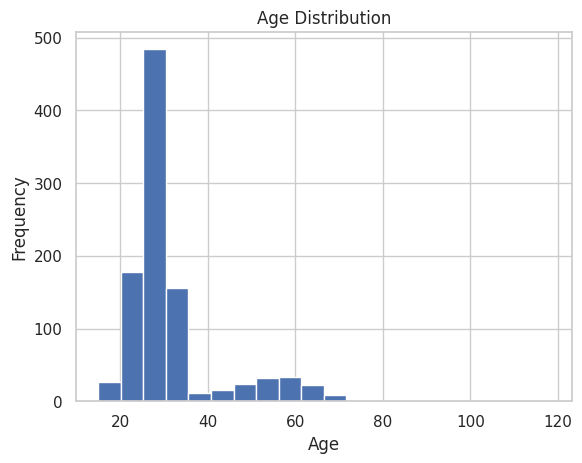

In [ ]:
plt.hist(dataset['Age'],bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Out of all the respondents people among the ages of 30-40 are the maximum in number.

Box Plot Distribution of all the columns of the dataset:

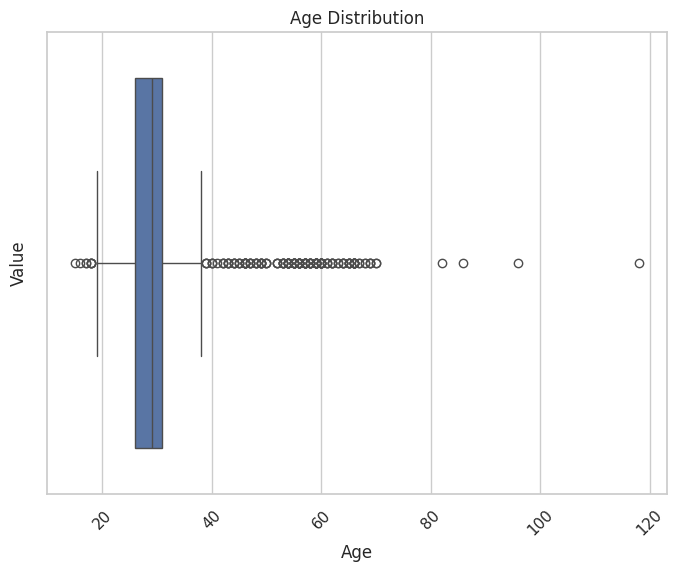

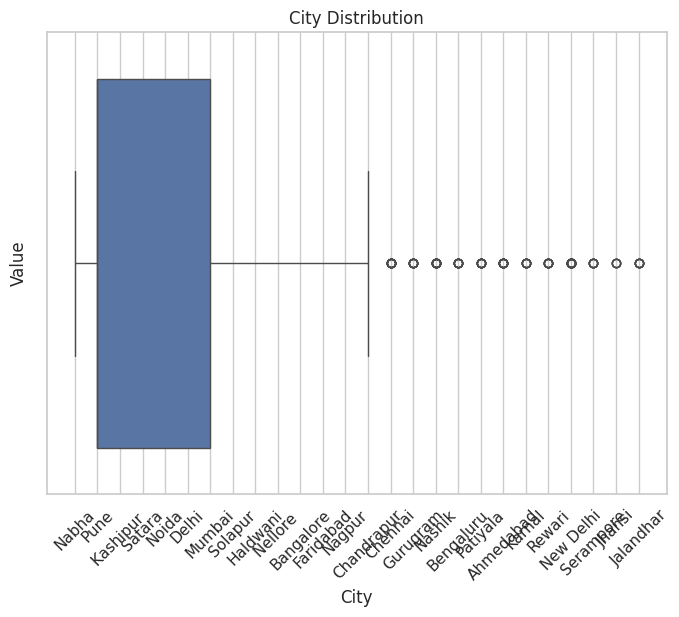

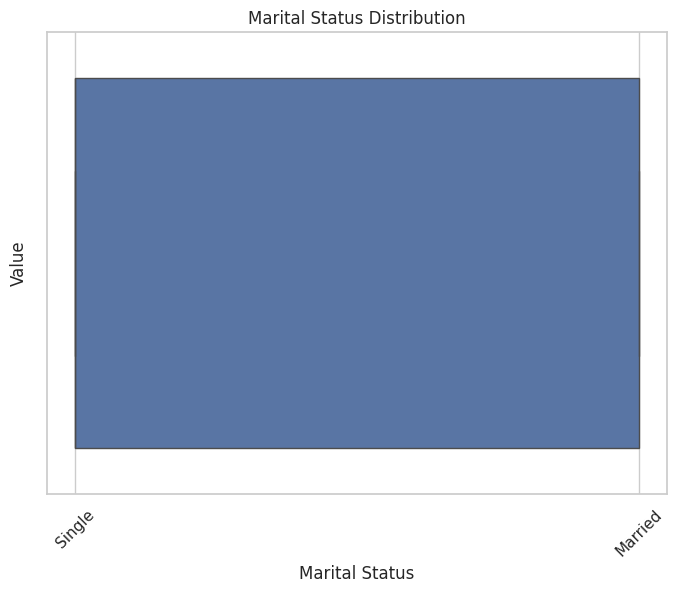

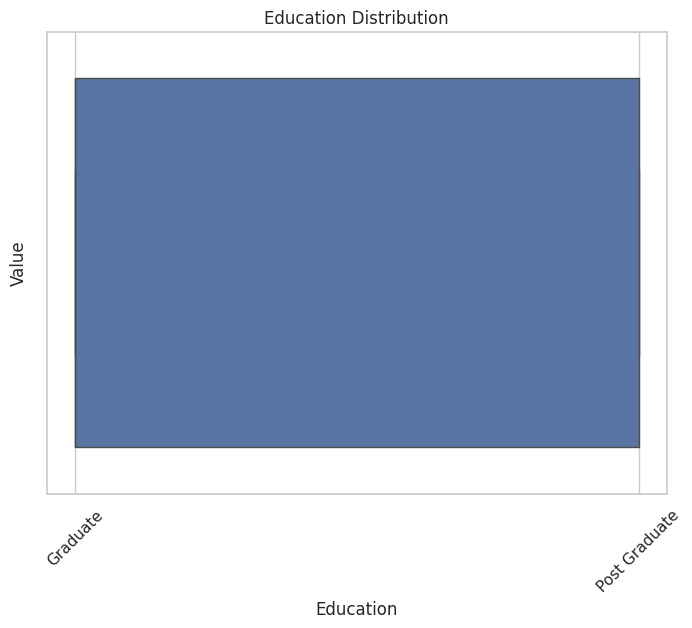

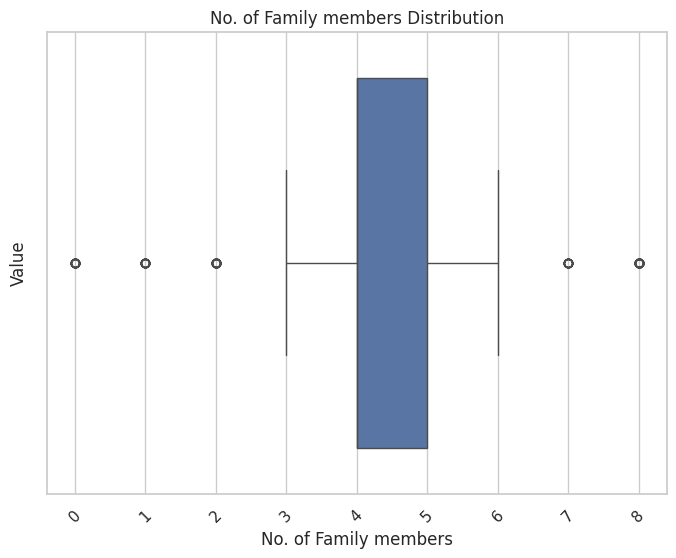

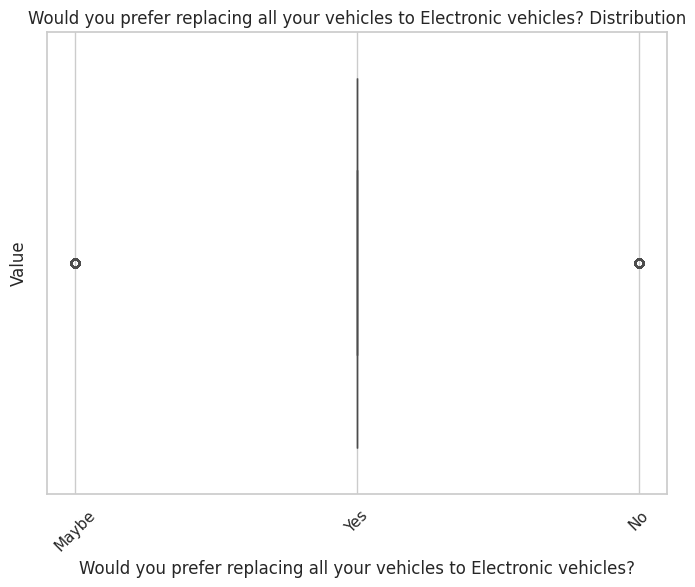

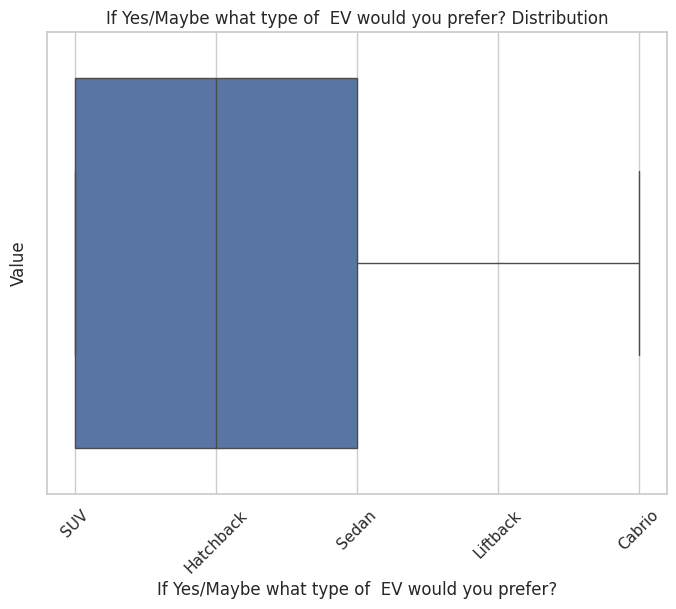

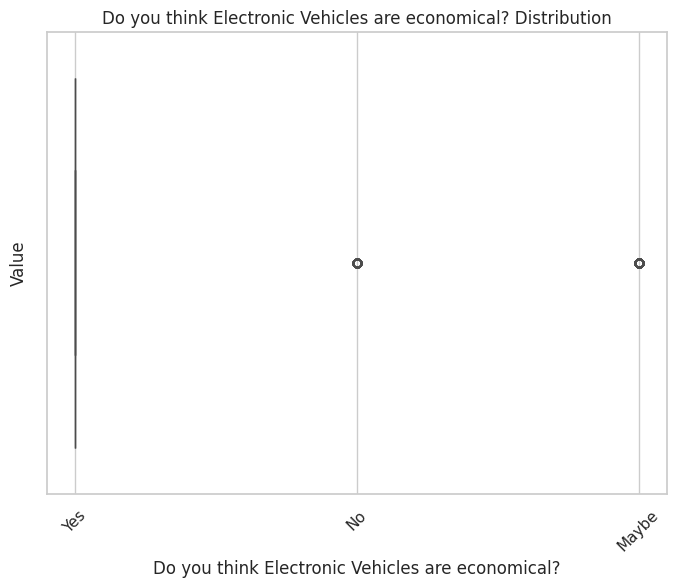

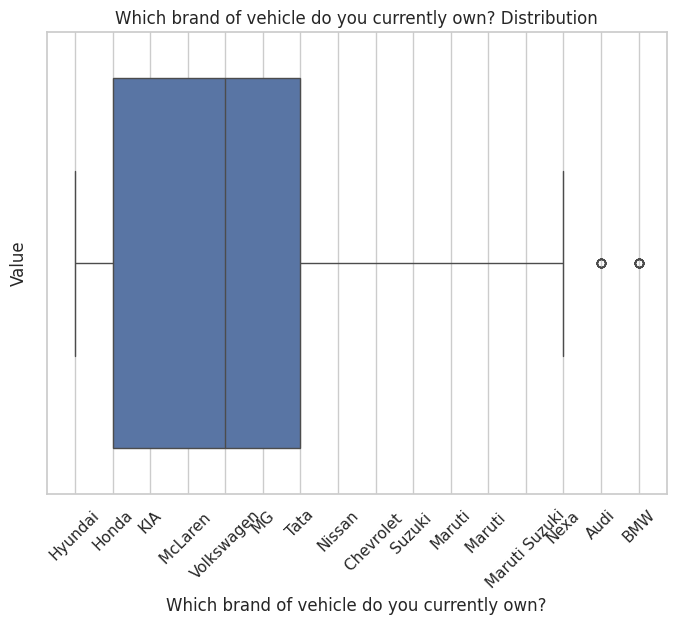

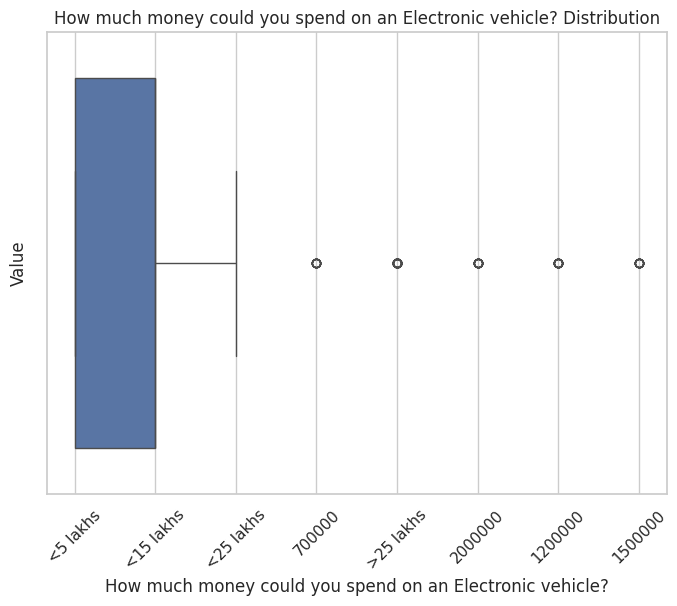

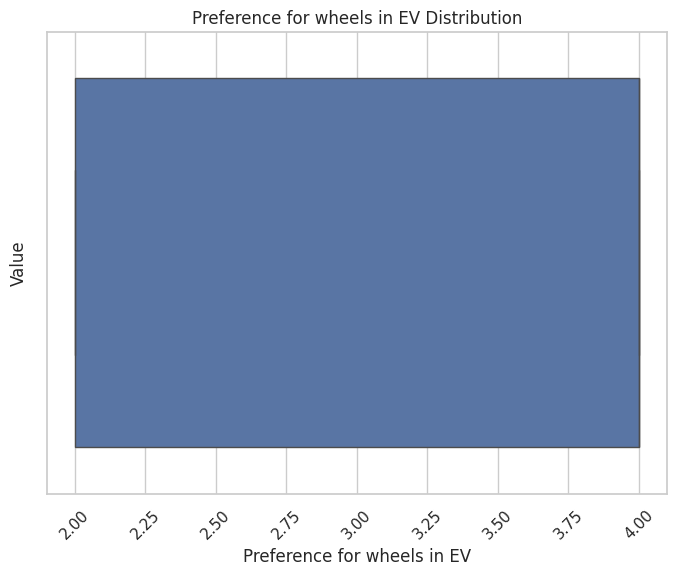

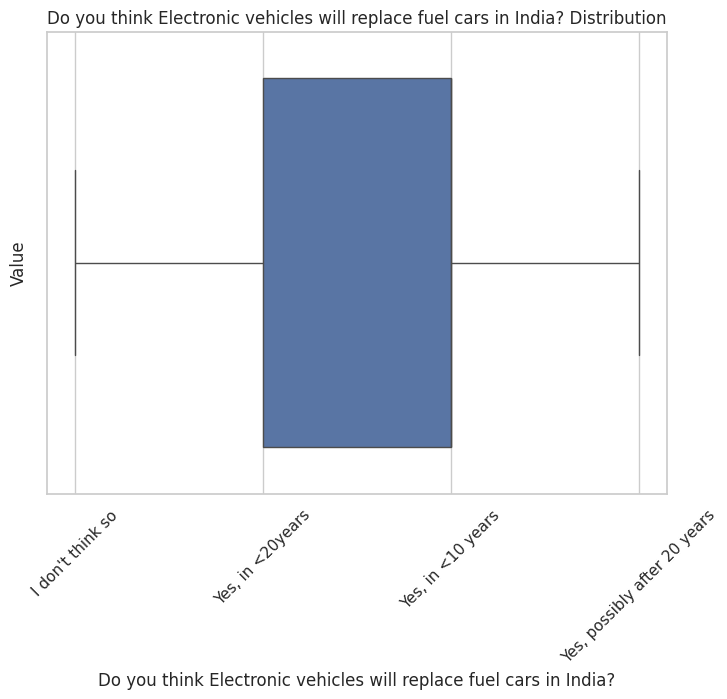

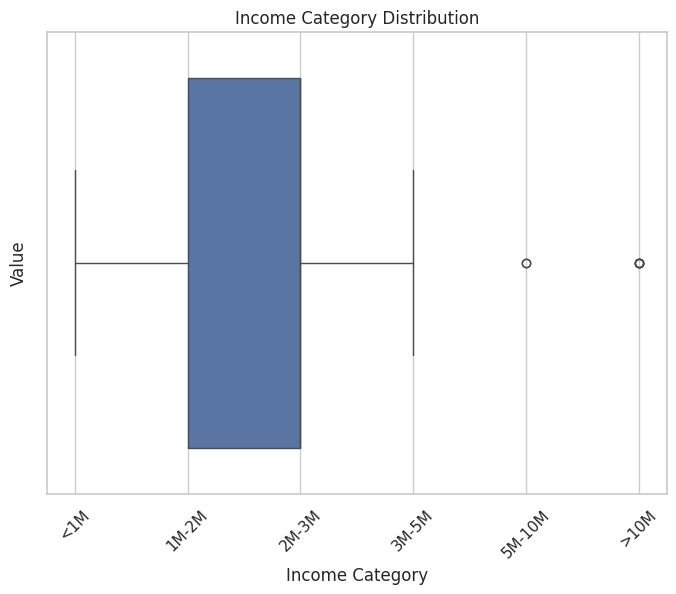

In [ ]:
for feature in dataset.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=dataset[feature])
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.show()

City Distribution:

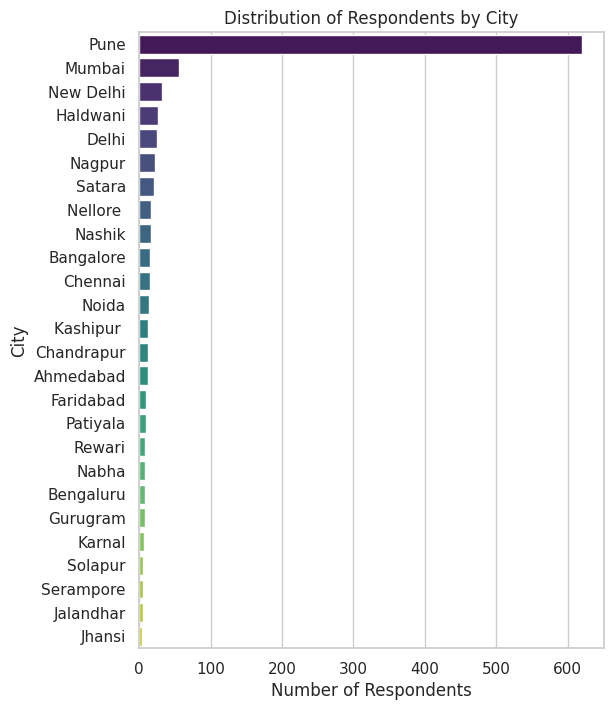

In [ ]:
# Count the number of respondents from each city
city_counts = dataset['City'].value_counts().reset_index()
city_counts.columns = ['City', 'Count']

# Set the style of seaborn
sns.set(style="whitegrid")

plt.figure(figsize=(6, 8))
sns.barplot(x='Count', y='City', data=city_counts, palette='viridis')
plt.title('Distribution of Respondents by City')
plt.xlabel('Number of Respondents')
plt.ylabel('City')
plt.show()

Maximum number of respondents are present in Pune.

Marital Status and Education:

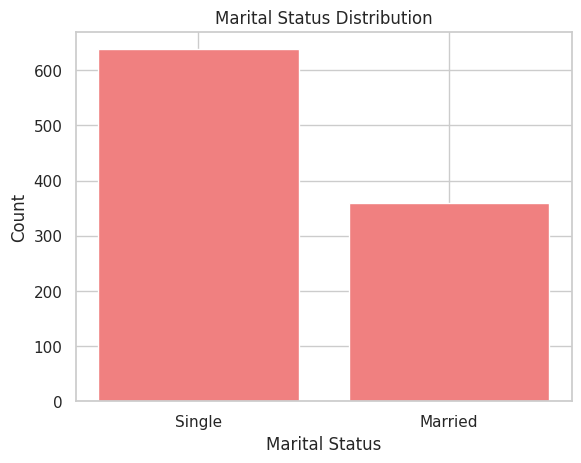

In [ ]:
plt.bar(dataset['Marital Status'].value_counts().index, dataset['Marital Status'].value_counts().values, color='lightcoral')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

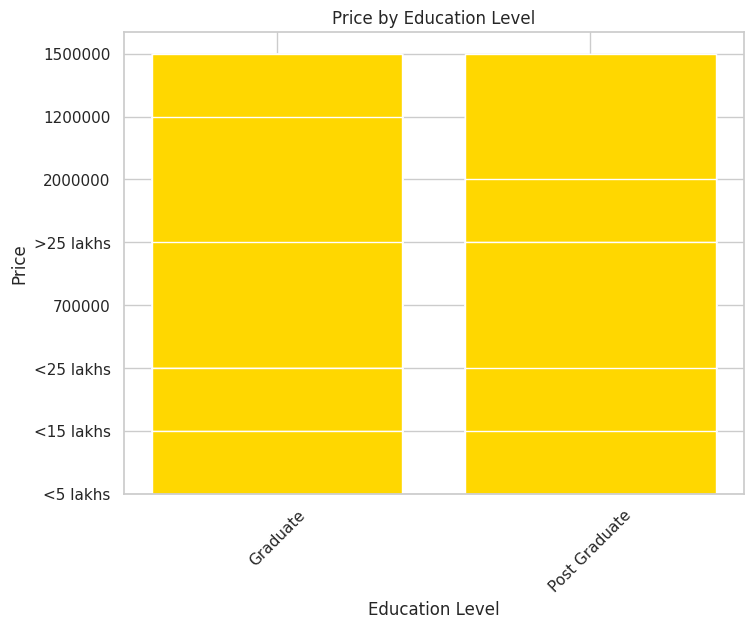

In [ ]:
# 4. Education Level
plt.figure(figsize=(8, 6))
plt.bar(dataset['Education'], dataset['How much money could you spend on an Electronic vehicle?'], color='gold')
plt.xticks(rotation=45)
plt.title('Price by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Price')
plt.show()

Number of family members:

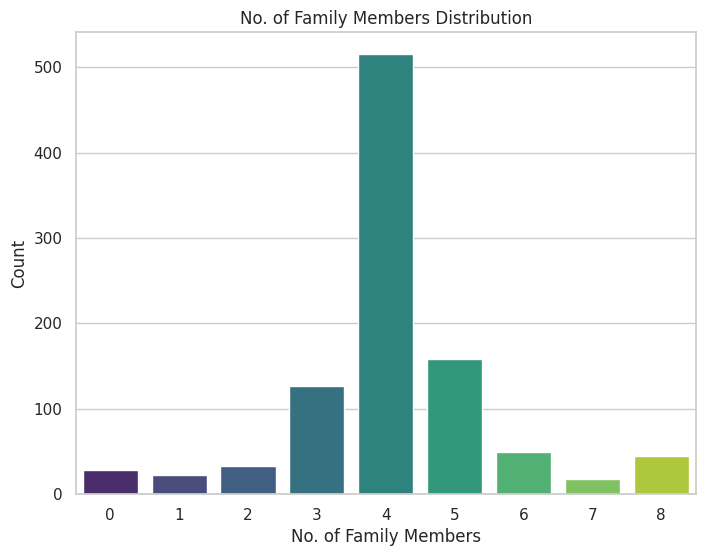

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x=dataset['No. of Family members'].value_counts().index, y=dataset['No. of Family members'].value_counts().values, palette='viridis')
plt.title('No. of Family Members Distribution')
plt.xlabel('No. of Family Members')
plt.ylabel('Count')
plt.show()

Vehicle Prefernce Analysis:

In [ ]:
df = dataset[['Marital Status', 'Education', 'City']]

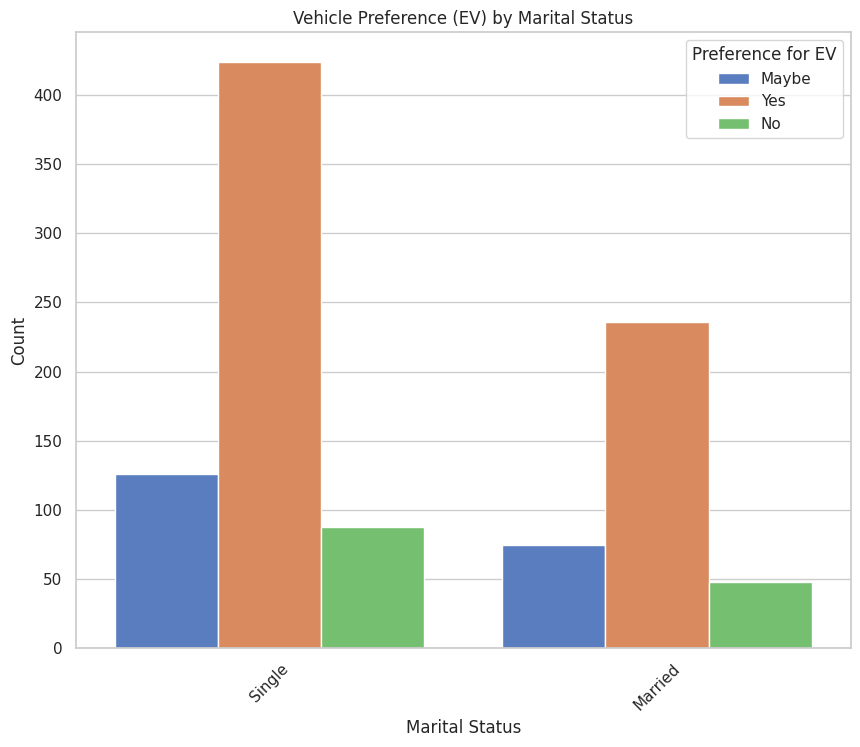

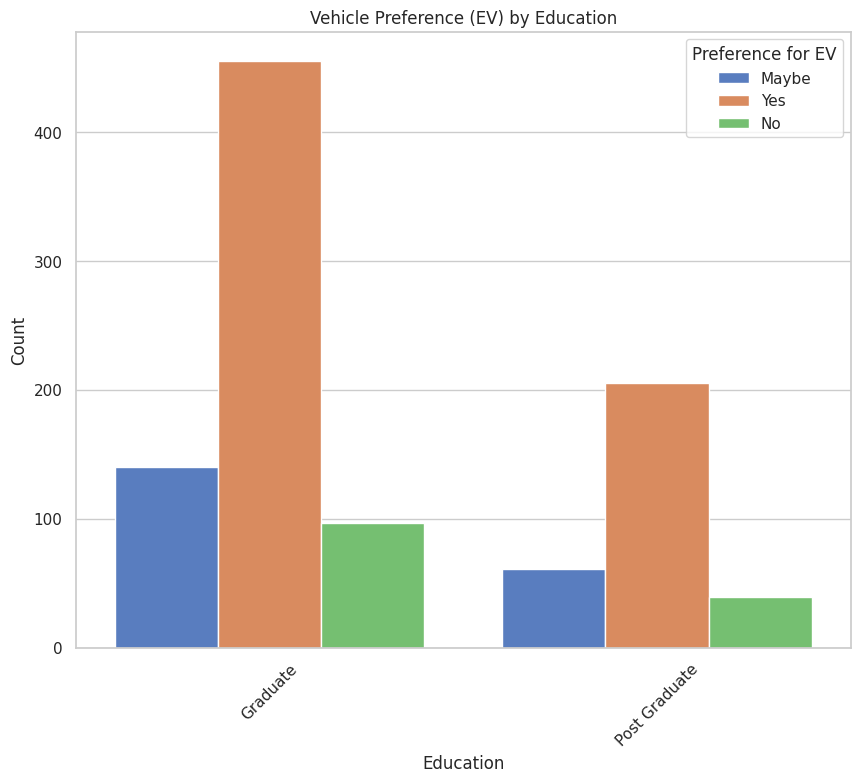

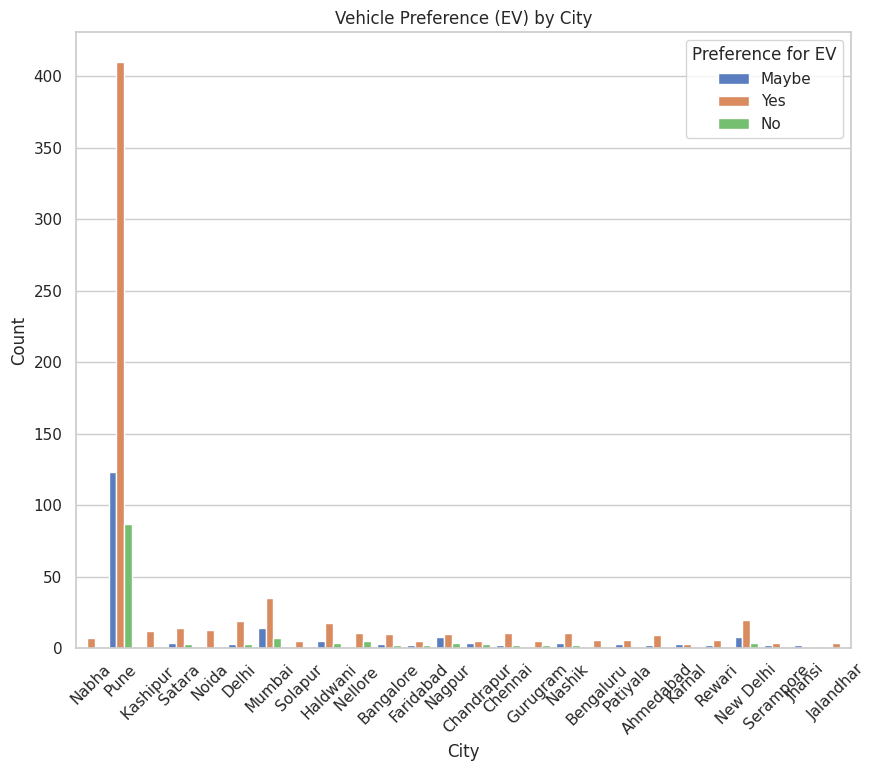

In [ ]:
for feature in df.columns:
    plt.figure(figsize=(10,8))
    sns.countplot(data=dataset, x=feature, hue='Would you prefer replacing all your vehicles to Electronic vehicles?', palette='muted')
    plt.title('Vehicle Preference (EV) by {}'.format(feature))
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Preference for EV')
    plt.xticks(rotation=45)
    plt.show()

Vehicle Preference Analysis excluding Pune:

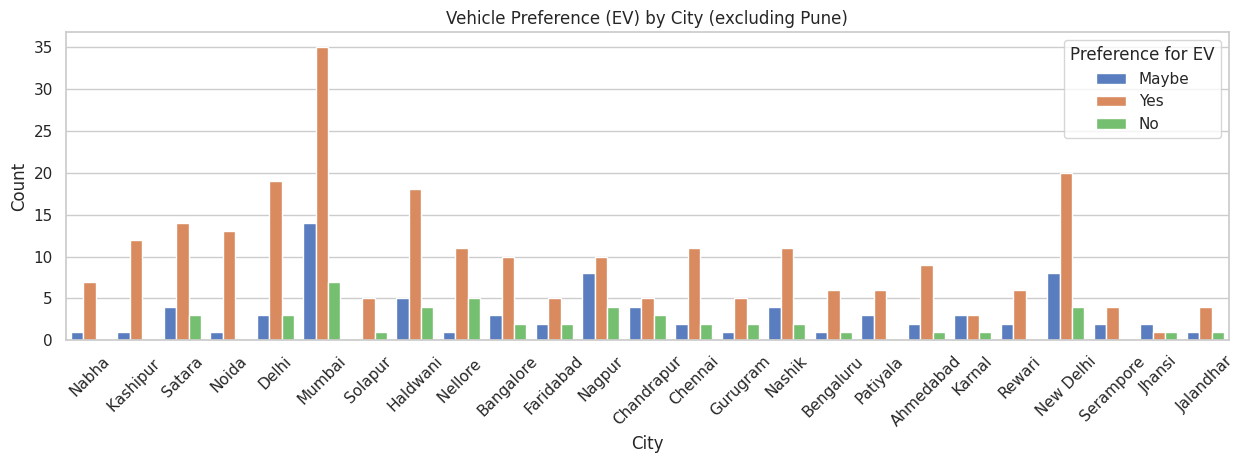

In [ ]:
df_filtered=dataset[dataset['City']!='Pune']
plt.figure(figsize=(15, 4))
sns.countplot(data=df_filtered, x='City', hue='Would you prefer replacing all your vehicles to Electronic vehicles?', palette='muted')
plt.title('Vehicle Preference (EV) by City (excluding Pune)')
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='Preference for EV')
plt.xticks(rotation=45)
plt.show()

Preferred Type of EV:

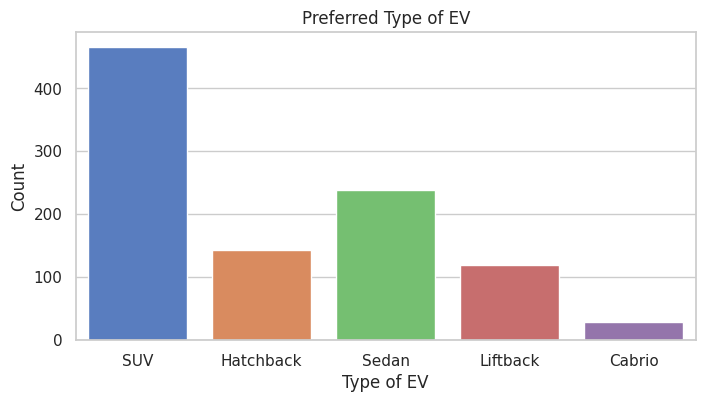

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=dataset, x='If Yes/Maybe what type of  EV would you prefer?', palette='muted')
plt.title('Preferred Type of EV')
plt.xlabel('Type of EV')
plt.ylabel('Count')
plt.show()


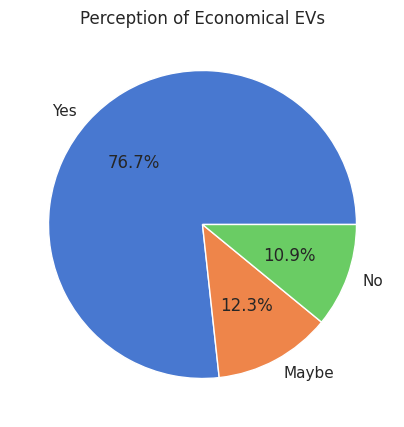

In [ ]:
# Count the responses for each category
economical_counts = dataset['Do you think Electronic Vehicles are economical?'].value_counts()

# Plot the data
plt.figure(figsize=(5,5))
plt.pie(economical_counts, labels=economical_counts.index, autopct='%1.1f%%', colors=sns.color_palette("muted"))
plt.title('Perception of Economical EVs')
plt.show()

Current Vehicle Brand Owned:

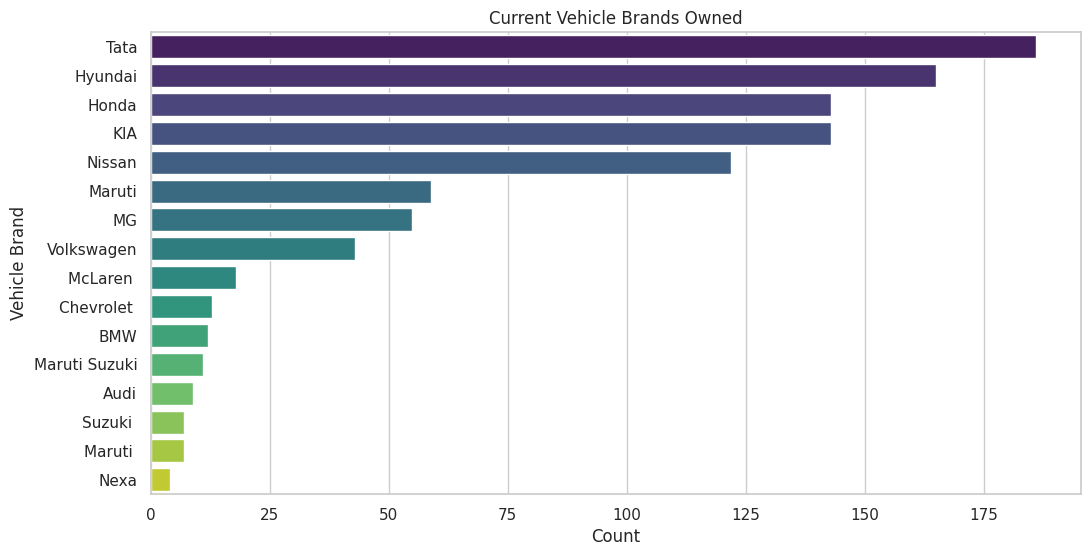

In [ ]:
# Plot the data
plt.figure(figsize=(12, 6))
sns.countplot(data=dataset, y='Which brand of vehicle do you currently own?', palette='viridis', order=dataset['Which brand of vehicle do you currently own?'].value_counts().index)
plt.title('Current Vehicle Brands Owned')
plt.xlabel('Count')
plt.ylabel('Vehicle Brand')
plt.show()

Budget for an EV:

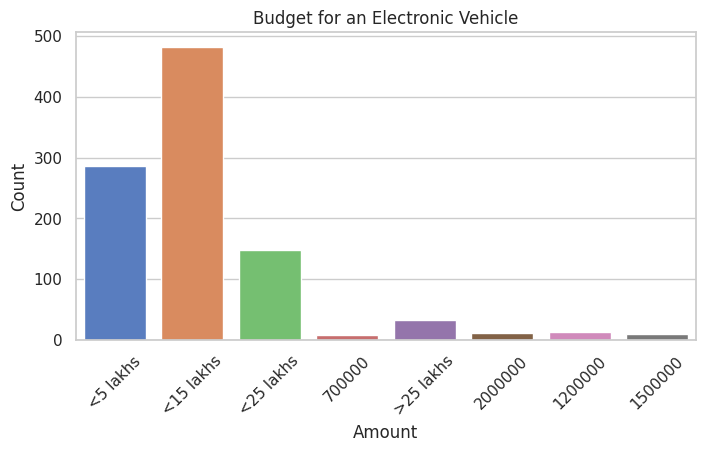

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=dataset, x='How much money could you spend on an Electronic vehicle?', palette='muted')
plt.title('Budget for an Electronic Vehicle')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Wheels Preference in EV:

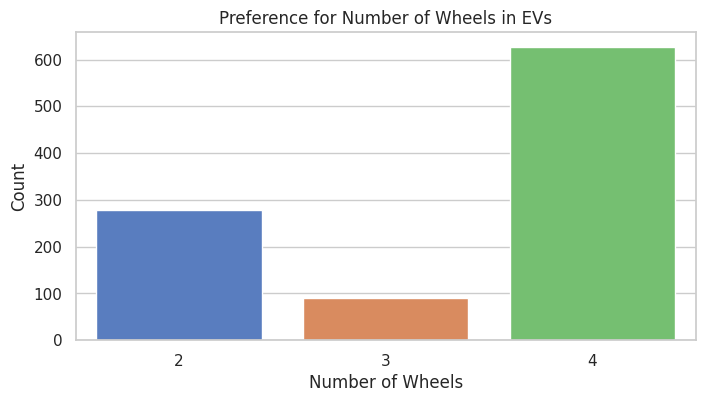

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=dataset, x='Preference for wheels in EV', palette='muted')
plt.title('Preference for Number of Wheels in EVs')
plt.xlabel('Number of Wheels')
plt.ylabel('Count')
plt.show()

Future of EVs:

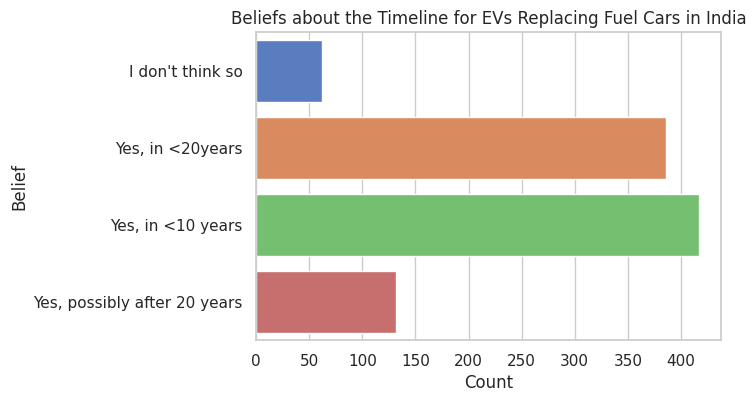

In [ ]:

# Plot the bar chart
plt.figure(figsize=(6, 4))
sns.countplot(data=dataset, y='Do you think Electronic vehicles will replace fuel cars in India?', palette='muted')
plt.title('Beliefs about the Timeline for EVs Replacing Fuel Cars in India')
plt.xlabel('Count')
plt.ylabel('Belief')
plt.show()

Income Category Analysis:

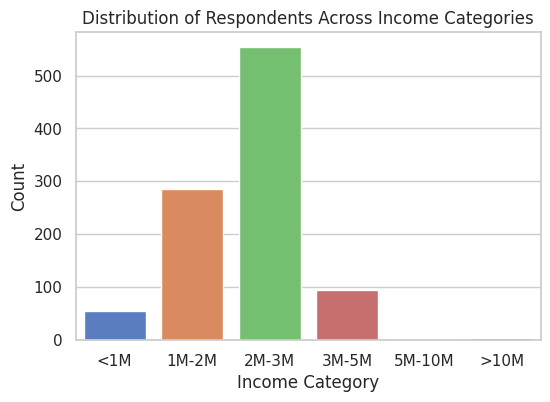

In [ ]:
# Bar Chart for Income Category Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=dataset, x='Income Category', palette='muted')
plt.title('Distribution of Respondents Across Income Categories')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.show()

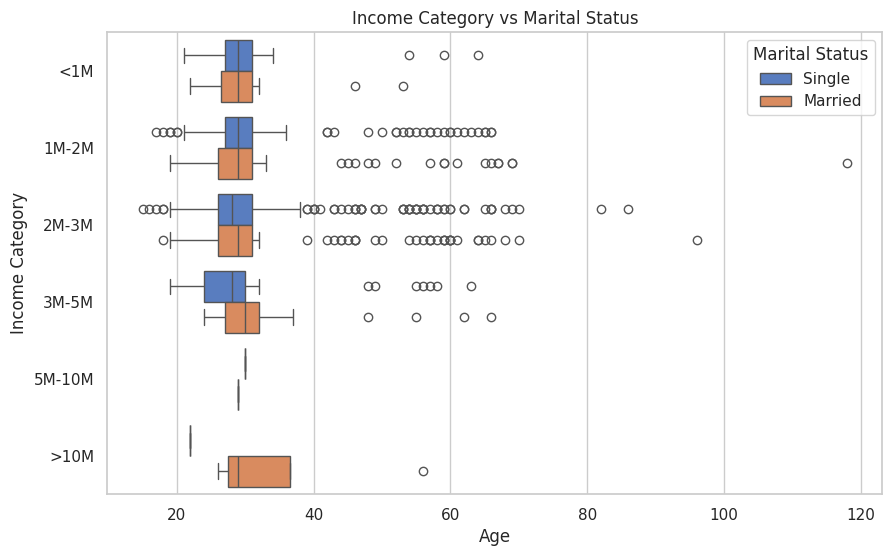

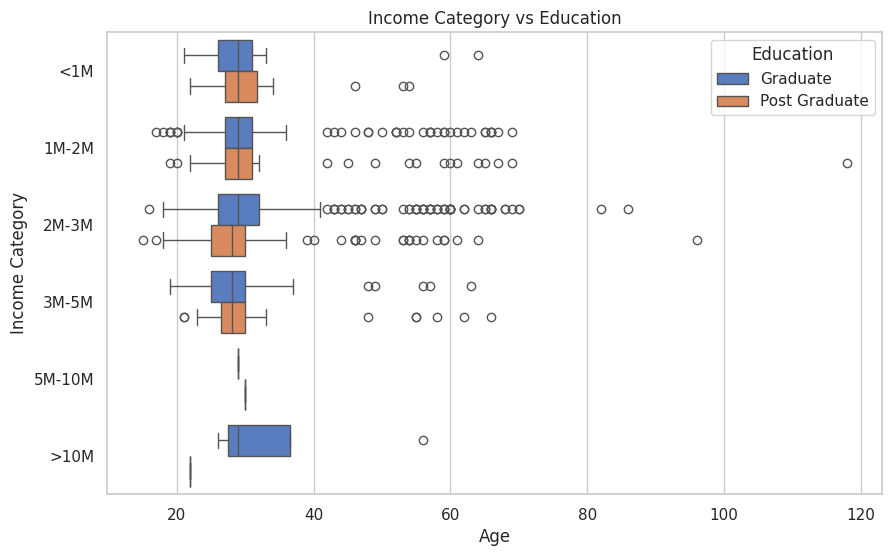

In [ ]:
df=dataset[['Marital Status','Education']]
for data in df.columns:
  plt.figure(figsize=(10, 6))
  sns.boxplot(data=dataset, y='Income Category', x='Age',hue=data, palette='muted')
  plt.title('Income Category vs {}'.format(data))
  plt.ylabel('Income Category')
  plt.xlabel('Age')
  plt.legend(title=data)
  plt.show()

Correlation Matrix:

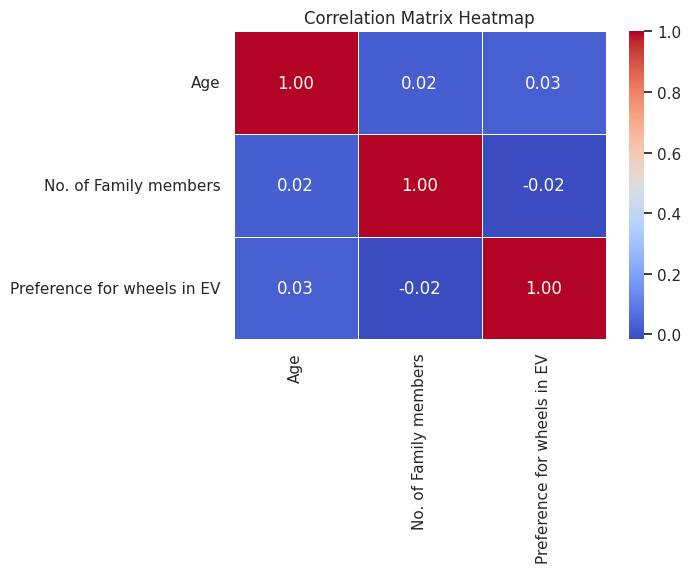

In [ ]:
# Exclude non-numeric columns
numeric_df = dataset.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

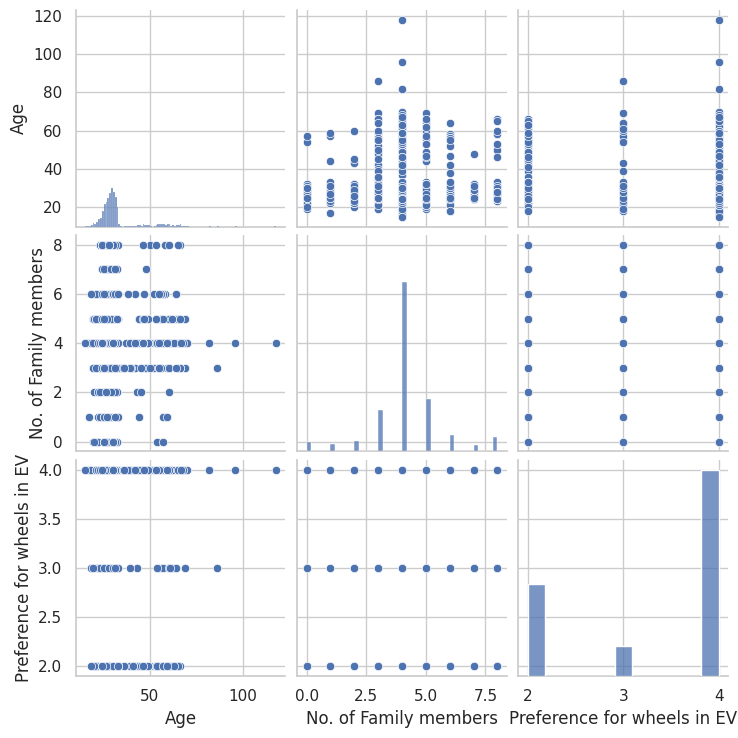

In [ ]:
sns.pairplot(dataset)

MODEL BUILDING FOR CLUSTERING:

In [ ]:
from sklearn.preprocessing import LabelEncoder
def label_encode(data, columns):
    le = LabelEncoder()
    return le.fit_transform(data[columns].astype(str))

In [ ]:
for feature in dataset.columns:
  if dataset[feature].dtype=='object':
    dataset[feature]=label_encode(dataset,feature)

In [ ]:
dataset.head()

,Age,City,Marital Status,Education,No. of Family members,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?,Income Category
0,30,14,1,0,5,0,3,2,4,6,2,0,1M-2M
1,27,21,1,0,4,2,3,2,3,4,4,2,1M-2M
2,32,12,1,0,4,2,1,2,5,4,4,2,2M-3M
3,55,21,1,0,3,0,1,1,4,6,4,1,2M-3M
4,26,23,1,0,4,2,4,2,10,4,4,2,2M-3M


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

y = dataset['City']
X = dataset.drop(['City'],axis=1,inplace = True)

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

X = dataset.iloc[:,:-1]

calc_vif(X)

,variables,VIF
0,Age,7.905573
1,Marital Status,2.716941
2,Education,1.445411
3,No. of Family members,8.147355
4,Would you prefer replacing all your vehicles t...,4.071235
5,If Yes/Maybe what type of EV would you prefer?,7.007965
6,Do you think Electronic Vehicles are economical?,6.214045
7,Which brand of vehicle do you currently own?,3.833010
8,How much money could you spend on an Electroni...,12.755365
9,Preference for wheels in EV,12.226999


In [ ]:
data_actual=df_1

In [ ]:
data_actual.head()

,Age,City,Marital Status,Education,No. of Family members,Annual Income,Would you prefer replacing all your vehicles to Electronic vehicles?,If Yes/Maybe what type of EV would you prefer?,Do you think Electronic Vehicles are economical?,Which brand of vehicle do you currently own?,How much money could you spend on an Electronic vehicle?,Preference for wheels in EV,Do you think Electronic vehicles will replace fuel cars in India?
0,30,Nabha,Single,Graduate,5,1193875.647,Maybe,SUV,Yes,Hyundai,<5 lakhs,2,I don't think so
1,27,Pune,Single,Graduate,4,1844540.398,Yes,SUV,Yes,Honda,<15 lakhs,4,"Yes, in <20years"
2,32,Kashipur,Single,Graduate,4,2948150.113,Yes,Hatchback,Yes,KIA,<15 lakhs,4,"Yes, in <20years"
3,55,Pune,Single,Graduate,3,2832379.739,Maybe,Hatchback,No,Hyundai,<5 lakhs,4,"Yes, in <10 years"
4,26,Satara,Single,Graduate,4,2638750.576,Yes,Sedan,Yes,McLaren,<15 lakhs,4,"Yes, in <20years"


In [ ]:
income_categories = {
    '700000': '<5 lakhs',
    '1200000': '<15 lakhs',
    '1500000': '<15 lakhs',
    '2000000': '<25 lakhs'
}

In [ ]:
# Replace number values with categories in the 'How much money could you spend on an Electronic vehicle?' column
data_actual['How much money could you spend on an Electronic vehicle?'] = data_actual['How much money could you spend on an Electronic vehicle?'].replace(income_categories)

# Display the unique values in the column to verify the replacements
print(data_actual['How much money could you spend on an Electronic vehicle?'].unique())
# Define the bins and labels
bins = [0, 1000000, 2000000, 3000000, 5000000, 10000000, float('inf')]
labels = ['<1M', '1M-2M', '2M-3M', '3M-5M', '5M-10M', '>10M']

# Use cut to bin the values
data_actual['Income Category'] = pd.cut(data_actual['Annual Income'], bins=bins, labels=labels)
data_actual['Income Category'].value_counts()
# data_actual.head()

['<5 lakhs' '<15 lakhs' '<25 lakhs' '>25 lakhs']


Income Category
2M-3M     554
1M-2M     286
3M-5M      94
<1M        56
>10M        5
5M-10M      2
Name: count, dtype: int64

In [ ]:
data_actual.drop('Annual Income', axis=1, inplace = True)

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

In [ ]:
features = ['Age', 'City', 'Marital Status', 'Education', 'No. of Family members',
            'Would you prefer replacing all your vehicles to Electronic vehicles?',
            'Do you think Electronic Vehicles are economical?',
            'Which brand of vehicle do you currently own?',
            'How much money could you spend on an Electronic vehicle?',
            'Preference for wheels in EV',
            'Do you think Electronic vehicles will replace fuel cars in India?',
            'Income Category']

In [ ]:
# Separating the features we want to consider for clustering
X = data_actual[features]

In [ ]:
numeric_features = ['No. of Family members']
numeric_transformer = StandardScaler()

In [ ]:
categorical_features = ['City', 'Marital Status', 'Education',
                        'Would you prefer replacing all your vehicles to Electronic vehicles?',
                        'Do you think Electronic Vehicles are economical?',
                        'Which brand of vehicle do you currently own?',
                        'How much money could you spend on an Electronic vehicle?',
                        'Do you think Electronic vehicles will replace fuel cars in India?',
                        'Income Category']
categorical_transformer = OneHotEncoder()

In [ ]:
# Combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
# Creating a preprocessing and clustering pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('cluster', KMeans(n_clusters=5, random_state=42))])

In [ ]:
pipeline.fit(X)
cluster_labels = pipeline.named_steps['cluster'].labels_
data_actual['Cluster'] = cluster_labels

print(data_actual.head())

   Age       City Marital Status Education  No. of Family members  \
0   30      Nabha         Single  Graduate                      5   
1   27       Pune         Single  Graduate                      4   
2   32  Kashipur          Single  Graduate                      4   
3   55       Pune         Single  Graduate                      3   
4   26     Satara         Single  Graduate                      4   

  Would you prefer replacing all your vehicles to Electronic vehicles?  \
0                                              Maybe                     
1                                                Yes                     
2                                                Yes                     
3                                              Maybe                     
4                                                Yes                     

  If Yes/Maybe what type of  EV would you prefer?  \
0                                             SUV   
1                                 

In [ ]:
# computing the mean values of numerical features for each cluster
cluster_means = data_actual.groupby('Cluster')[numeric_features].mean()

for feature in categorical_features:
    mode_series = data_actual.groupby('Cluster')[feature].agg(lambda x: x.mode()[0])
    cluster_means[feature] = mode_series

print(cluster_means)

         No. of Family members  City Marital Status      Education  \
Cluster                                                              
0                     4.059155  Pune         Single       Graduate   
1                     7.000000  Pune         Single       Graduate   
2                     4.071713  Pune         Single  Post Graduate   
3                     1.058824  Pune         Single       Graduate   
4                     4.010000  Pune        Married       Graduate   

        Would you prefer replacing all your vehicles to Electronic vehicles?  \
Cluster                                                                        
0                                                      Yes                     
1                                                      Yes                     
2                                                      Yes                     
3                                                      Yes                     
4                            

Based on the mean values of numerical features and the most frequent categories for categorical features within each cluster, we can assign names to each cluster that reflect their defining characteristics. Here's a suggestion:


*   **CLUSTER 0: Urban Young Professionals**

      Characteristics:
          1. Average family size of about 4 members
          2. Primarily residing in Pune
          3. Predominantly single and hold a graduate degree
          4. Strong preference for replacing all vehicles with electric ones
          5. Perceive electric vehicles as cost-effective
          6. Typically own Hyundai cars
          7. Willing to spend less than 15 lakhs on an electric vehicle
          8. Expect electric vehicles to replace fuel cars within 10 years
          9. Income range between 2M-3M
          
*   **CLUSTER 1: Wealthy Urban Singles**

      Characteristics:
          1. Larger family size with an average of 7 members
          2. Mainly based in Pune
          3. Largely single and graduates
          4. Likely to opt for replacing all vehicles with electric vehicles
          5. View electric vehicles as economical
          6. Usually own Hyundai cars
          7. Prepared to spend under 15 lakhs on an electric vehicle
          8. Believe electric vehicles will dominate over fuel cars in less than 10 years
          9. Income bracket of 2M-3M
*   **CLUSTER 2: Tech-Savvy Postgraduates**

      Characteristics:
          1. Family size averaging around 4 members
          2. Mostly found in Pune
          3. Primarily single and possess postgraduate degrees
          4. Prefer to replace all vehicles with electric ones
          5. Consider electric vehicles to be economical
          6. Usually own Tata cars
          7. Willing to invest less than 15 lakhs in an electric vehicle
          8. Think electric vehicles will overtake fuel cars in less than 20 years
          9. Income bracket of 2M-3M
*   **CLUSTER 3: Budget-Conscious Young Urban Singles**
  
      Characteristics:
          1. Small family size, averaging around 1 member
          2. Primarily located in Pune
          3. Mostly single and graduates
          4. Likely to favor replacing all vehicles with electric vehicles
          5. Believe electric vehicles are economical
          6. Usually own Tata cars
          7. Ready to spend less than 15 lakhs on an electric vehicle
          8. Expect electric vehicles to replace fuel cars within 10 years
          9. Income range of 2M-3M


*   **CLUSTER 4: Diverse Urban Families**

      Characteristics:
          1. Moderate family size with an average of around 4 members
          2. Mostly residing in Pune
          3. Predominantly married and graduates
          4. Likely to prefer replacing all vehicles with electric vehicles
          5. View electric vehicles as economical
          6. Usually own Tata cars
          7. Ready to spend less than 15 lakhs on an electric vehicle
          8. Believe electric vehicles will replace fuel cars in less than 20 years
          9. Income range of 2M-3M




